In [1]:
import pandas as pd

# Get all function from wrangling.py
from wrangling import *

In [2]:
PATH = 'Dataset/olist.db'

# Call function open_database() to open database
database, df_dataset_list = open_database(PATH)

In [3]:
df_dataset_list

,type,name,tbl_name,rootpage,sql
0,table,olist_order_customer_dataset,olist_order_customer_dataset,2,"CREATE TABLE ""olist_order_customer_dataset"" (\..."
1,table,olist_order_dataset,olist_order_dataset,2644,"CREATE TABLE ""olist_order_dataset"" (\n""index"" ..."
2,table,olist_order_reviews_dataset,olist_order_reviews_dataset,7660,"CREATE TABLE ""olist_order_reviews_dataset"" (\n..."
3,table,olist_order_payments_dataset,olist_order_payments_dataset,11735,"CREATE TABLE ""olist_order_payments_dataset"" (\..."
4,table,olist_order_items_dataset,olist_order_items_dataset,13754,"CREATE TABLE ""olist_order_items_dataset"" (\n""i..."
5,table,olist_products_dataset,olist_products_dataset,18289,"CREATE TABLE ""olist_products_dataset"" (\n""inde..."
6,table,olist_sellers_dataset,olist_sellers_dataset,18983,"CREATE TABLE ""olist_sellers_dataset"" (\n""index..."
7,table,olist_geolocation_dataset,olist_geolocation_dataset,19040,"CREATE TABLE ""olist_geolocation_dataset"" (\n""i..."
8,table,product_category_name_translation,product_category_name_translation,33966,"CREATE TABLE ""product_category_name_translatio..."


In [4]:
# Call function open_database() to open all database for inspection purpose
dataset_name, dataset_data = open_dataset(database, df_dataset_list)

In [5]:
print(dataset_data)

{'olist_order_customer_dataset':        index                       customer_id  \
0          0  06b8999e2fba1a1fbc88172c00ba8bc7   
1          1  18955e83d337fd6b2def6b18a428ac77   
2          2  4e7b3e00288586ebd08712fdd0374a03   
3          3  b2b6027bc5c5109e529d4dc6358b12c3   
4          4  4f2d8ab171c80ec8364f7c12e35b23ad   
...      ...                               ...   
99436  99436  17ddf5dd5d51696bb3d7c6291687be6f   
99437  99437  e7b71a9017aa05c9a7fd292d714858e8   
99438  99438  5e28dfe12db7fb50a4b2f691faecea5e   
99439  99439  56b18e2166679b8a959d72dd06da27f9   
99440  99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18

-----------

# 1. What are the top 10 best-selling product categories in Olist Marketplace?

Table used:
1. `Olist Order Items`
2. `Olist Products`
3. `Product Category Name Translation`

## a. Data Wrangling

### - Extract relevant dataset from database

In [6]:
# Olist Order Items -> olist_order_items_dataset 
dataset_data[dataset_name[4]]

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
# Olist Products -> olist_products_dataset
dataset_data[dataset_name[5]]

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
# Product Category Name Translation -> product_category_name_translation
dataset_data[dataset_name[8]]

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### - Joining relevant dataset from database

In [9]:
obj_query_1 = """
SELECT
i.order_id,
i.order_item_id,
i.product_id,
p.product_category_name,
pt.product_category_name_english
FROM olist_order_items_dataset AS i
LEFT JOIN olist_products_dataset AS p
ON i.product_id = p.product_id
LEFT JOIN product_category_name_translation AS pt
ON p.product_category_name = pt.product_category_name
"""

# Call function read_query_dataset() to extract and join relevant dataset from database
df_obj_1 = read_query_dataset(obj_query_1, database)
df_obj_1

,order_id,order_item_id,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,computers_accessories


## b. Data Cleaning

### - Handling Missing Data

In [10]:
# NaN value identification from data features
df_obj_1.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
product_category_name            1603
product_category_name_english    1627
dtype: int64

As the number of rows which has the NaN value in product category (1603 rows) is not significant if compared to the overall data (112650 rows), thus the row which has the NaN value as the product category will be dropped. We will only focus on the product which has the information regarding the category.

In [11]:
# Drop the row which has the NaN value in original name of product category feature
df_obj_1.dropna(subset=['product_category_name'], inplace=True, ignore_index=True)

In [12]:
# NaN value re-identification from data features
df_obj_1.isna().sum()

order_id                          0
order_item_id                     0
product_id                        0
product_category_name             0
product_category_name_english    24
dtype: int64

In [13]:
# Get the unique value of original product category which haven't had the english translation
df_obj_1.loc[df_obj_1['product_category_name_english'].isna(), 'product_category_name'].unique()

array(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

There are still rows which not have the english translation of the product category. It is identified that the remaining product categories which don't have the english translation are 'portateis_cozinha_e_preparadores_de_alimentos' and 'pc_gamer'. Instead of dropping the rows, the english translation will be obtained manually using translator library that implemented Google Translate API.

The function for translating has been made on `wrangling.py` as `translate_category_to_english()`

In [14]:
# Call the function translate_category_to_english() to translate the remaining original product categories
df_obj_1 = translate_category_to_english(df_obj_1, 'product_category_name', 'product_category_name_english')

In [15]:
# NaN value re-identification from data features
df_obj_1.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

There is no missing value left

### - Handling Inconsistent Format

In [16]:
df_obj_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111047 entries, 0 to 111046
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       111047 non-null  object
 1   order_item_id                  111047 non-null  int64 
 2   product_id                     111047 non-null  object
 3   product_category_name          111047 non-null  object
 4   product_category_name_english  111047 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


The type of data match the purpose of each features

In [17]:
# Check the number of unique original product category 
len(df_obj_1['product_category_name'].unique())

73

In [18]:
# Check the number of unique original product category 
len(df_obj_1['product_category_name_english'].unique())

73

The amount of product category is more than 70 different categories. As the form of `product_category_name` and `product_category_name_english` features value are in text, it is a good practice to do text normalization

In [19]:
# Call function text_normalization() to normalize both original product category name and its english translation
df_obj_1['product_category_name'] = df_obj_1['product_category_name'].apply(lambda s: text_normalization(s))
df_obj_1['product_category_name_english'] = df_obj_1['product_category_name_english'].apply(lambda s: text_normalization(s))

In [20]:
# Check the consistency of information in 'product_category_name' and 'product_category_name_english'
"""
The consistency can be checked by comparing the number of all original product category name and its translation.
If both numbers are equal, thus both features are consistent
"""

statement = "Equality of Original Category and English Category"

# Call function compare_column_consistency() to check the consistency between those two features
compare_column_consistency(df_obj_1, 'product_category_name', 'product_category_name_english', statement)

Equality of Original Category and English Category = True


It is proven that both `product_category_name` and `product_category_name_english` features are consistent in which has 73 different product categories.

### - Handling Duplicate Data

In [21]:
# Duplicate data identification
df_obj_1[df_obj_1.duplicated()]

,order_id,order_item_id,product_id,product_category_name,product_category_name_english


There is duplicate data. Thus, handling duplicate data is not needed

## c. Data Manipulation

### - Grouping Data

Grouping data by `'product_category_name_english'` feature as the product category and `'order_id'` feature as the number of sales for each product category. In this case, only top 10 best-selling product category will be focused on 

In [22]:
grouped_df_obj_1 = df_obj_1.groupby('product_category_name_english').agg({'order_id':['count']})
res_obj_1 = grouped_df_obj_1.apply(lambda x: x.sort_values(ascending=False).head(10))

res_obj_1

,order_id
,count
product_category_name_english,
bed bath table,11115
health beauty,9670
sports leisure,8641
furniture decor,8334
computers accessories,7827
housewares,6964
watches gifts,5991
telephony,4545


## d. Analysis

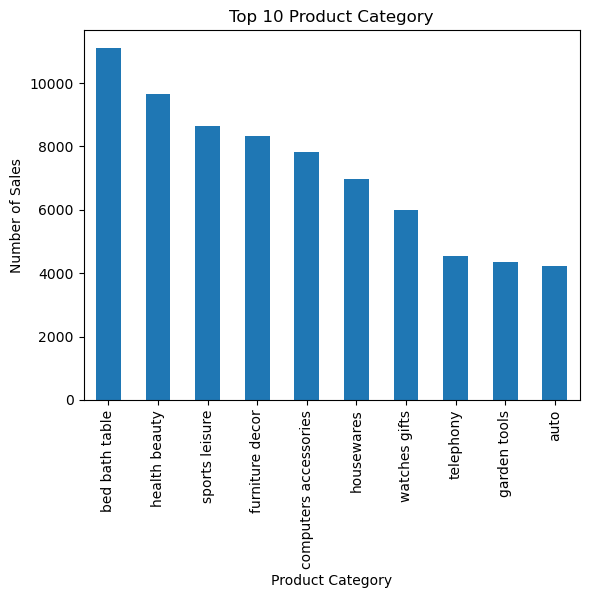

In [23]:
# Call function create_plot() to plot the grouped data
plot_type = 'bar'
title = "Top 10 Product Category"
x_label = "Product Category"
y_label = "Number of Sales"
create_plot(res_obj_1, plot_type, None, title, x_label, y_label)

The top 10 best-selling product categories are:
1. Bed Bath Table
2. Health Beauty
3. Sports Leisure
4. Furniture Decor
5. Computers Accessories
6. Housewares
7. Watches Gifts
8. Telephony
9. Garden Tools
10. Auto

These product categories likely contribute significantly to Olist marketplace. For marketing strategy, the marketplace can focus more on these categories to attract more customer to buy their necessities from Olist marketplace. Marketplace can make advertisements using various products on these categories to promote the marketplace. By using products from this category as marketplace advertising material, it will indirectly emphasize to the public that Olist marketplace can be trusted as a place to buy products from these categories. Marketplace can also consider in generating voucher codes for these categories

# 2. What is the most-used payment type for transaction in Olist marketplace?

## a. Data Wrangling

### - Extract relevant dataset from database

Table used:
1. `Olist Order Items`
2. `Olist Order Payments`

In [24]:
# Olist Order Items -> olist_order_items_dataset 
dataset_data[dataset_name[4]]

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [25]:
# Olist Order Payments -> olist_order_payments_dataset
dataset_data[dataset_name[3]]

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### - Joining relevant dataset from database

In [26]:
obj_query_2 = """
SELECT
i.order_id,
p.payment_type
FROM olist_order_items_dataset AS i
LEFT JOIN olist_order_payments_dataset AS p
ON i.order_id = p.order_id
"""
# Call function read_query_dataset() to extract and join relevant dataset from database
df_obj_2 = read_query_dataset(obj_query_2, database)
df_obj_2

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,boleto
117600,fffcd46ef2263f404302a634eb57f7eb,boleto
117601,fffce4705a9662cd70adb13d4a31832d,credit_card
117602,fffe18544ffabc95dfada21779c9644f,credit_card


## b. Data Cleaning

### - Handling Missing Data

In [27]:
# NaN value identification from data features
df_obj_2.isna().sum()

order_id        0
payment_type    3
dtype: int64

In [28]:
# Check the rows with NaN value
df_obj_2[df_obj_2[['payment_type']].isna().any(axis=1)]

,order_id,payment_type
88091,bfbd0f9bdef84302105ad712db648a6c,None
88092,bfbd0f9bdef84302105ad712db648a6c,None
88093,bfbd0f9bdef84302105ad712db648a6c,None


As the number of rows which has the NaN value in payment type (3 rows) is not significant if compared to the overall data (117604 rows) and does not carry important factor, thus the row which has the NaN value as the payment type will be dropped. We will only focus on the order records which has the information regarding the payment type.

In [29]:
# Drop the row which has the NaN value in payment type
df_obj_2.dropna(inplace=True, ignore_index=True)

In [30]:
# NaN value re-identification from data features
df_obj_2.isna().sum()

order_id        0
payment_type    0
dtype: int64

There is no missing value left

### - Handling Inconsistent Format

In [31]:
df_obj_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      117601 non-null  object
 1   payment_type  117601 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


The type of data match the purpose of each features.

As the form of `payment_type` features value are in text, it is a good practice to do text normalization

In [32]:
# Call function text_normalization() to normalize the payment type
df_obj_2['payment_type'] = df_obj_2['payment_type'].apply(lambda s: text_normalization(s))

### - Handling Duplicate Data

In [33]:
# Duplicate data identification
df_obj_2[df_obj_2.duplicated(keep=False)]

,order_id,payment_type
13,0008288aa423d2a3f00fcb17cd7d8719,boleto
14,0008288aa423d2a3f00fcb17cd7d8719,boleto
32,00143d0f86d6fbd9f9b38ab440ac16f5,credit card
33,00143d0f86d6fbd9f9b38ab440ac16f5,credit card
34,00143d0f86d6fbd9f9b38ab440ac16f5,credit card
...,...,...
117586,fff8287bbae429a99bb7e8c21d151c41,credit card
117591,fffb9224b6fc7c43ebb0904318b10b5f,boleto
117592,fffb9224b6fc7c43ebb0904318b10b5f,boleto
117593,fffb9224b6fc7c43ebb0904318b10b5f,boleto


There are a lot of rows which has the same `order_id` and the `payment_type`. In this case, the duplicate data will be removed. For the case where one order ID have multiple payment type, the data will be kept as every payment type used is valid.

In [34]:
# Remove duplicate row which has the same value for both order ID and payment type
df_obj_2.drop_duplicates(inplace=True, ignore_index=True)

In [35]:
# Result of remaining data after removing duplicate rows
df_obj_2

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit card
1,00018f77f2f0320c557190d7a144bdd3,credit card
2,000229ec398224ef6ca0657da4fc703e,credit card
3,00024acbcdf0a6daa1e931b038114c75,credit card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit card
...,...,...
100887,fffc94f6ce00a00581880bf54a75a037,boleto
100888,fffcd46ef2263f404302a634eb57f7eb,boleto
100889,fffce4705a9662cd70adb13d4a31832d,credit card
100890,fffe18544ffabc95dfada21779c9644f,credit card


## c. Data Manipulation

### - Grouping Data

Grouping data by `'payment_type'` feature as the payment type and `'order_id'` feature as the number of transaction used each payment type.

In [36]:
grouped_df_obj_2 = df_obj_2.groupby('payment_type').agg({'order_id':['count']})
res_obj_2 = grouped_df_obj_2.apply(lambda x: x.sort_values(ascending=False))

res_obj_2

,order_id
,count
payment_type,
credit card,75991
boleto,19614
voucher,3766
debit card,1521


# d. Analysis

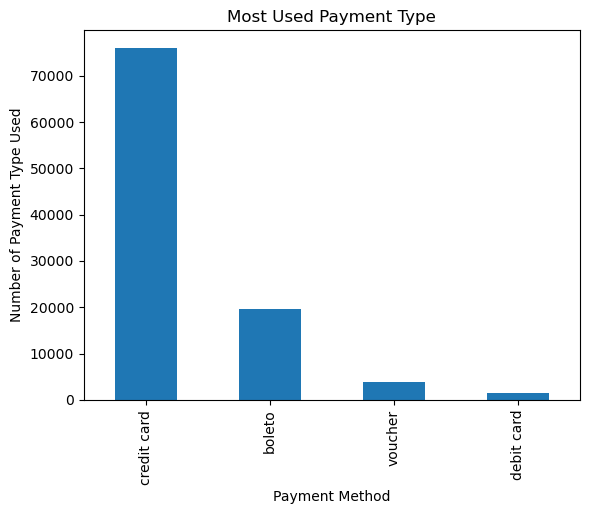

In [37]:
# Call function create_plot() to plot the grouped data
plot_type = 'bar'
title = "Most Used Payment Type"
x_label = "Payment Method"
y_label = "Number of Payment Type Used"
create_plot(res_obj_2, plot_type, None, title, x_label, y_label)

There are 4 payment type used in the transaction on Olist Marketplace:
1. Credit card
2. Boleto*
3. Voucher
4. Debit card

From the graph, it is shown that credit card is the most-used payment type for transaction in Olist marketplace. This is expected as credit card is a method that encourage customer to do impulse buying due to the easy, quick, and efficient transactions. This is a good fact for Olist marketplace to forming a partnership with credit card companies to offer exclusive discounts or promo for the customer when using the credit card as their payment type.

*Note:
Boleto is a cash-based payment method used in Brazil (source: adyen.com)

# 3. What are the names of 5 cities where most of Olist marketplace customer reside?

## a. Data Wrangling

### - Extract relevant dataset from database

Table used:
1. `Olist Orders`
2. `Olist Customers`

In [38]:
# Olist Customers -> olist_order_customer_dataset
dataset_data[dataset_name[0]]

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [39]:
# Olist Orders -> olist_order_dataset
dataset_data[dataset_name[1]]

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### - Joining relevant dataset from database

In [40]:
obj_query_3 = """
SELECT
o.customer_id,
c.customer_city
FROM olist_order_dataset AS o
LEFT JOIN olist_order_customer_dataset AS c
ON o.customer_id = c.customer_id
"""

df_obj_3 = read_query_dataset(obj_query_3, database)
df_obj_3

,customer_id,customer_city
0,9ef432eb6251297304e76186b10a928d,sao paulo
1,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras
2,41ce2a54c0b03bf3443c3d931a367089,vianopolis
3,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante
4,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre
...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,sao jose dos campos
99437,1fca14ff2861355f6e5f14306ff977a7,praia grande
99438,1aa71eb042121263aafbe80c1b562c9c,nova vicosa
99439,b331b74b18dc79bcdf6532d51e1637c1,japuiba


## b. Data Cleaning

### - Handling Missing Data

In [41]:
# NaN value identification from data features
df_obj_3.isna().sum()

customer_id      0
customer_city    0
dtype: int64

There is no missing data

### - Handling Inconsistent Format

In [42]:
df_obj_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    99441 non-null  object
 1   customer_city  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


The type of data match the purpose of each features

In [43]:
# Check the number of unique city
len(df_obj_3['customer_city'].unique())

4119

The amount of city is more than 4000 different cities. As a good practice, the text normalization will be implemented for all value in `customer_city` feature to remove unrelated characters or trailing characters as text data is case sensitive. This might help in getting more valid city as there might be a chance that there is a same city name but detected as different city due to case sensitive.

In [44]:
#Call function text_normalization() to normalize the payment type
df_obj_3['customer_city'] = df_obj_3['customer_city'].apply(lambda s: text_normalization(s))

In [45]:
# Re-check the number of unique city
len(df_obj_3['customer_city'].unique())

4119

It seems like 4119 is indeed the valid number of city

### - Handling Duplicate Data

In [46]:
# Duplicate data identification
df_obj_3[df_obj_3.duplicated(keep=False)]

,customer_id,customer_city


There is duplicate data. Thus, handling duplicate data is not needed

## c. Data Manipulation

Grouping data by `customer_city` feature as the customer's city and `customer_id` feature as the number of customer who has at least do transaction on Olist marketplace once to identify their city.

In [47]:
grouped_df_obj_3 = df_obj_3.groupby('customer_city').agg({'customer_id':['count']})
res_obj_3 = grouped_df_obj_3.apply(lambda x: x.sort_values(ascending=False).head(5))

res_obj_3

,customer_id
,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521


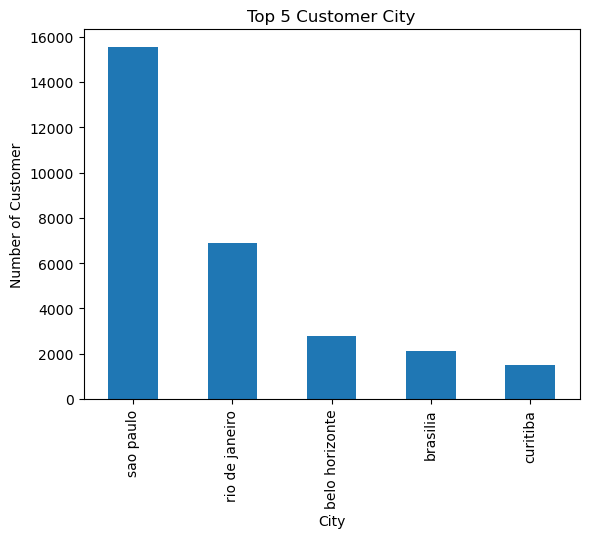

In [48]:
# Call function create_plot() to plot the grouped data
plot_type = 'bar'
title = "Top 5 Customer City"
x_label = "City"
y_label = "Number of Customer"
create_plot(res_obj_3, plot_type, None, title, x_label, y_label)

## d. Analysis

5 cities where most of Olist marketplace customer reside are:
1. Sao Paulo
2. Rio de Janeiro
3. Belo Horizonte
4. Brasilia
5. Curitiba

Olist maketplace can optimize the logistic and delivery operations. One of the optimizations that can be is opening warehouse to those cities. If the marketplace open a warehouse in those cities, customers are likely to do more transaction due to the low delivery fee. If Olist marketplace want to gradually open warehouse in those cities, Olist marketplace can open a warehouse starting from Sao Paulo, followed by Rio de Janeiro, and so on.